In [1]:
# ************************************************************************* ----
# Params ----
# ************************************************************************* ----

library(ggplot2)

In [2]:
# ************************************************************************* ----
# Load data ----
# ************************************************************************* ----

# read data
capacity_data = read.csv(file = '../outputs/results/merged_pal_self_suff_influence2.csv')
head(capacity_data)

,self_sufficiency_factor,territory2,value,pct_change,value_fudged,pct_change2
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,Israel,31.95556,NA,31.95556,NA
2,20,Israel,31.91624,-0.12307332,31.91624,-0.12307332
3,30,Israel,31.88166,-0.10834559,31.88166,-0.10834559
4,40,Israel,31.82650,-0.17301881,31.82650,-0.17301881
5,50,Israel,31.79937,-0.08522662,31.79937,-0.08522662
6,60,Israel,32.36551,1.78033725,32.36551,1.78033725


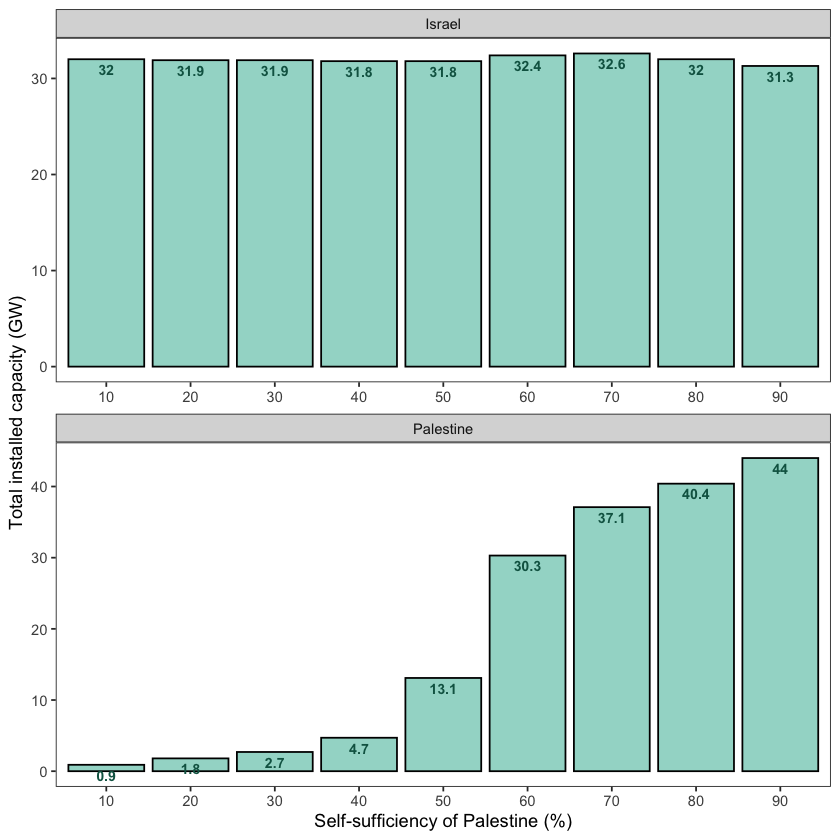

In [3]:
# ************************************************************************* ----
# GRAPH ----
# ************************************************************************* ----

# get rid of Jordan
capacity_data = capacity_data[capacity_data$territory2 != 'Jordan',]

# round units
capacity_data$pct_change2 = round(capacity_data$pct_change2,1)
capacity_data$value_fudged = round(capacity_data$value_fudged,1)

ggplot(capacity_data, 
       aes(fill=self_sufficiency_factor, 
           y=value_fudged, 
           x=factor(self_sufficiency_factor)) #, level = c('GZA','WBK','JOR','ISR','Total')
    ) + 
    geom_bar(position="dodge",
             stat="identity",
             fill='#a2d9ce',
             colour='black',
    ) +
    geom_text(aes(label=value_fudged), 
              vjust = 1.5, 
              color = "#0e6251", 
              size = 3,
              fontface = "bold"
    ) +
    # scale_fill_manual(values=c(# Gaza
    #                            "#f5b041",
    #                            # Israel
    #                            "#1f618d",
    #                            # Jordan
    #                            "#e74c3c",
    #                            # total
    #                            "lightgray",
    #                            # west bank
    #                            "#16a085")
    # ) +
    facet_wrap(~territory2, scales = "free", ncol = 1
    ) +
    theme_bw(
    ) + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position="none",
    ) + 
    xlab("Self-sufficiency of Palestine (%)"
    ) + 
    ylab("Total installed capacity (GW)"
    ) +
    labs(fill=''
    ) #+
    #scale_y_continuous(limits = c(-0.5, 25)
    #)

# save figure
ggsave("../outputs/figures/oms_pal_self_sufficiency.png", 
       width = 10, 
       height = 17.5, 
       units = "cm")